<a href="https://colab.research.google.com/github/SrishtiYadav17/Stock-Price-Predictor/blob/master/Predictor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
!pip install TFANN

In [0]:
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.preprocessing import scale
from TFANN import ANNR
from google.colab import files

In [56]:
files.upload()


Saving BoB.csv to BoB (3).csv


{'BoB.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\r\n41862,173.600006,179.100006,172.399994,178.070007,172.836182,694300\r\n41863,178.820007,183.830002,177.199997,182.649994,177.281555,811415\r\n41864,181.699997,181.699997,174.720001,175.830002,170.662003,889575\r\n41865,176.399994,177.369995,173.199997,175.789993,170.623184,754085\r\n41869,175.199997,178.199997,174.399994,177.160004,171.952927,608090\r\n41870,177.669998,179.199997,175.910004,177.5,172.282928,817310\r\n41871,177.399994,177.600006,174.449997,176.039993,170.865829,537310\r\n41872,176.399994,181.699997,175.630005,180.229996,174.932693,1049235\r\n41873,181,185.929993,181,183.970001,178.562759,1179590\r\n41876,184,186.100006,178.199997,179.139999,173.874725,756550\r\n41877,179.199997,179.199997,175.899994,178.179993,172.942932,496685\r\n41878,179,180.380005,177,177.550003,172.331467,540985\r\n41879,177.949997,178.529999,173.330002,174.169998,169.050797,642185\r\n41883,174.399994,178.600006,174.399994,177.860001,172.63

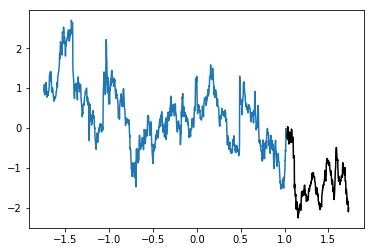

In [57]:
 
stock_data = np.loadtxt('BoB.csv', delimiter=",", skiprows=1, usecols=(0, 4))

stock_data=scale(stock_data)

prices = stock_data[:, 1].reshape(-1,1)
dates = stock_data[:, 0].reshape(-1,1)

limit = int(len(dates) * 0.8)
prices1 = prices[:limit]
prices2 = prices[limit:]
dates1 = dates[:limit]
dates2 = dates[limit:]

mpl.plot(dates1[:, 0], prices1[:, 0])
mpl.plot(dates2[:, 0], prices2[:, 0],c='#000000')
mpl.show()

In [0]:
#Number of neurons in the layers
inp = 1
out = 1
hidden = 128
# layers:3 hidden and 1 output and tanh activation function 
layers = [('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', hidden), ('AF', 'tanh'), ('F', out)]
#model construction.
mlpr = ANNR([inp], layers, batchSize = 350, maxIter = 20000, tol =0.2 , reg = 1e-4, verbose = True)

In [59]:

totalDays = len(dates1)

mlpr.fit(dates1, prices1)

Iter     1	      2.62507184 (Batch Size:   350)
Iter     2	      2.41131425 (Batch Size:   350)
Iter     3	      2.10264611 (Batch Size:   350)
Iter     4	      2.01891776 (Batch Size:   350)
Iter     5	      1.75955363 (Batch Size:   350)
Iter     6	      1.56872916 (Batch Size:   350)
Iter     7	      1.40797436 (Batch Size:   350)
Iter     8	      1.26043773 (Batch Size:   350)
Iter     9	      1.19165258 (Batch Size:   350)
Iter    10	      1.00190912 (Batch Size:   350)
Iter    11	      0.97897643 (Batch Size:   350)
Iter    12	      0.89130523 (Batch Size:   350)
Iter    13	      0.81253958 (Batch Size:   350)
Iter    14	      0.70327411 (Batch Size:   350)
Iter    15	      0.69712389 (Batch Size:   350)
Iter    16	      0.61681994 (Batch Size:   350)
Iter    17	      0.57461737 (Batch Size:   350)
Iter    18	      0.57797225 (Batch Size:   350)
Iter    19	      0.52036568 (Batch Size:   350)
Iter    20	      0.53002235 (Batch Size:   350)
Iter    21	      0.50570661 (Batch Size:

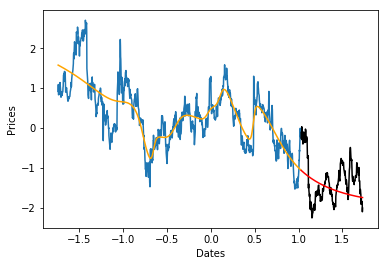

In [60]:
#Prediction process + plotting
pricePredict2 = mlpr.predict(dates2)
pricePredict1 = mlpr.predict(dates1)

mpl.plot(dates1, prices1)
mpl.plot(dates2, prices2, c='#000000')

#Uhm.. How about checking prediction for training set also...To get better idea.
mpl.plot(dates1, pricePredict1, c='#ffa500')

#The moment we have been waiting for !
mpl.plot(dates2, pricePredict2, c='#ff0000')

#Lets name the axes
mpl.xlabel("Dates")
mpl.ylabel("Prices")
mpl.show()

#from tensorflow import contrib
#tfe = contrib.eager
#test_acc= tfe.metrics.Accuracy()
#test_acc(pricePredict2,prices2)

#print ("Test Set Accuracy : {:.3%}".format(test_acc.result()))


In [0]:
#Number of neurons in the layers
in2 = 1
out2 = 1
hidden2 = 128
#layers, 3 hidden and 1 output,and tanh activation function 
layers = [('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', hidden2), ('AF', 'tanh'), ('F', out2)]
#construction 
mlpr2 = ANNR([in2], layers, batchSize = 300, maxIter = 20000, tol = 0.1, reg = 1e-4, verbose = True)

In [62]:

totalDays = len(dates1)

mlpr2.fit(dates1, prices1)

Iter     1	      1.18273485 (Batch Size:   300)
Iter     2	      0.98962761 (Batch Size:   300)
Iter     3	      0.87194553 (Batch Size:   300)
Iter     4	      0.76065655 (Batch Size:   300)
Iter     5	      0.62846911 (Batch Size:   300)
Iter     6	      0.59823148 (Batch Size:   300)
Iter     7	      0.50772746 (Batch Size:   300)
Iter     8	      0.50144329 (Batch Size:   300)
Iter     9	      0.48255345 (Batch Size:   300)
Iter    10	      0.44514937 (Batch Size:   300)
Iter    11	      0.48198737 (Batch Size:   300)
Iter    12	      0.46710345 (Batch Size:   300)
Iter    13	      0.44040936 (Batch Size:   300)
Iter    14	      0.46492759 (Batch Size:   300)
Iter    15	      0.47313171 (Batch Size:   300)
Iter    16	      0.45937169 (Batch Size:   300)
Iter    17	      0.46748375 (Batch Size:   300)
Iter    18	      0.48117710 (Batch Size:   300)
Iter    19	      0.47172819 (Batch Size:   300)
Iter    20	      0.46793896 (Batch Size:   300)
Iter    21	      0.47915078 (Batch Size:

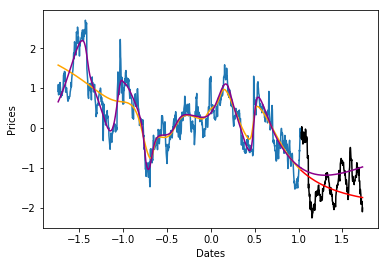

In [63]:
#Prediction Process + Plotting
pricePredict4 = mlpr2.predict(dates2)
pricePredict3 = mlpr2.predict(dates1)
mpl.plot(dates1, prices1)
mpl.plot(dates2, prices2, c="#000000")

#Uhm.. How about checking prediction for training set also...To get better idea.
mpl.plot(dates1, pricePredict1, c='#ffa500')
mpl.plot(dates1, pricePredict3, c='#8b008b')

#The moment we have been waiting for! 
mpl.plot(dates2, pricePredict2, c='#ff0000')
mpl.plot(dates2, pricePredict4, c='#8B008B')


#Lets name the axes.

mpl.xlabel("Dates")
mpl.ylabel("Prices")
mpl.show()